In [1]:
import pandas as pd
import math
from scipy import stats
import scipy
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv (r"-")
print (df)

      Unnamed: 0         x
0              1  0.074187
1              2  0.058624
2              3  0.011584
3              4  0.007977
4              5  0.208048
...          ...       ...
4995        4996  0.052144
4996        4997  0.066646
4997        4998  0.029344
4998        4999  0.002050
4999        5000  0.028198

[5000 rows x 2 columns]


In [3]:
x = (df.loc[:,"x"])

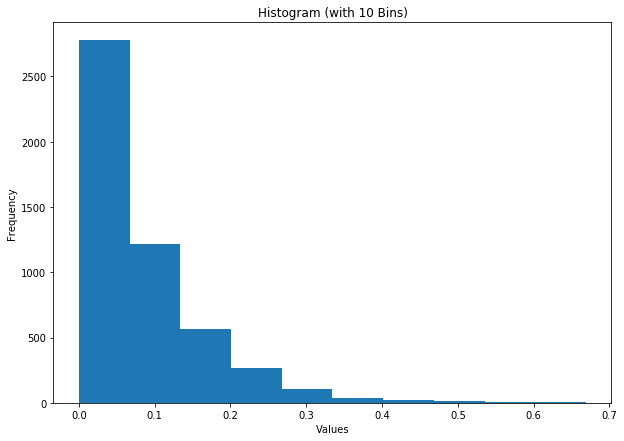

In [24]:
fig = plt.figure(figsize =(10, 7)) 
plt.hist(x, bins = 10)
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Histogram (with 10 Bins)")
plt.show()

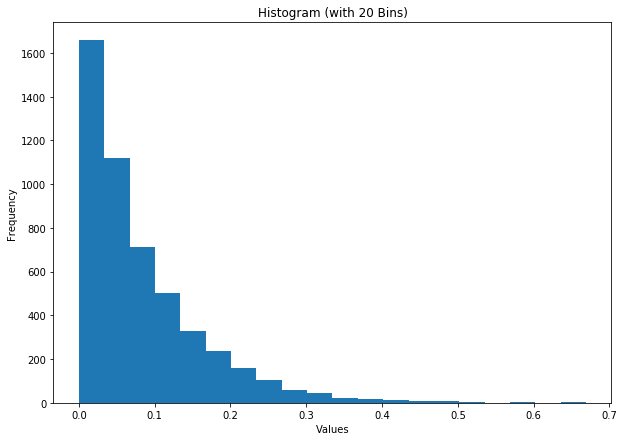

In [25]:
fig = plt.figure(figsize =(10, 7)) 
plt.hist(x, bins = 20)
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Histogram (with 20 Bins)")
plt.show()

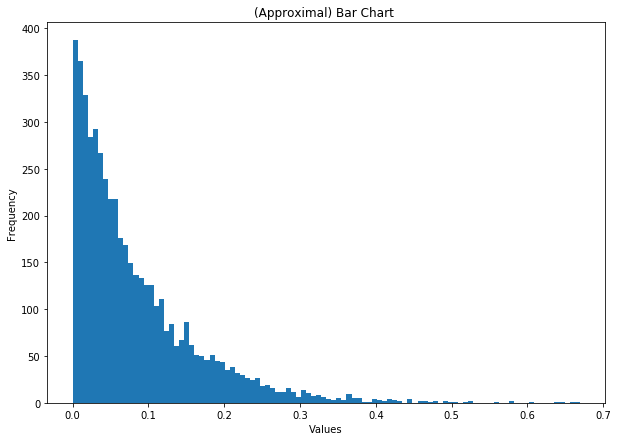

In [41]:
fig = plt.figure(figsize =(10, 7)) 
plt.hist(x, bins = 100)
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("(Approximal) Bar Chart ")
plt.show()

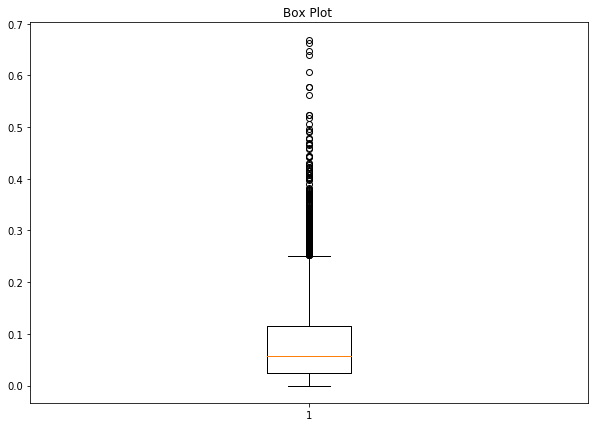

In [27]:
fig = plt.figure(figsize =(10, 7)) 
plt.boxplot(x) 
plt.title("Box Plot ")
# show plot 
plt.show() 

In [4]:
xarr = []
for num in x:
    xarr.append(num)
mean = 0
for num in xarr:
    mean += num
print(mean)
mean = mean/5000
print("Mean = " + str(mean))

414.9941609345372
Mean = 0.08299883218690744


In [52]:
observed_values = xarr
expected_values = np.random.exponential(0.083, 5000)

observed_values.sort()
#expected_values.sort()

In [53]:
scipy.stats.chisquare(observed_values, f_exp=expected_values)

Power_divergenceResult(statistic=4913.729793539453, pvalue=0.8026175571810862)

In [29]:
xarr.sort()
print(xarr[2499])
print(xarr[2500])
print("Median = " + str((xarr[2499] + xarr[2500])/2))

0.0574320148443803
0.0574533306450273
Median = 0.0574426727447038


In [30]:
dict = {}
for num in xarr:
    if num in dict:
        dict[num] += 1
    else:
        dict[num] = 1
NumbersAppearingOnce = 0
for key, val in dict.items():
    if(val==1):
        NumbersAppearingOnce += 1
print(NumbersAppearingOnce)

5000


In [31]:
df.describe()

,Unnamed: 0,x
count,5000.000000,5000.000000
mean,2500.500000,0.082999
std,1443.520003,0.082456
min,1.000000,0.000019
25%,1250.750000,0.024249
50%,2500.500000,0.057443
75%,3750.250000,0.115185
max,5000.000000,0.669187


In [32]:
stddev = 0
for num in xarr:
    stddev += (num - mean)*(num - mean)
stddev = stddev/4999
stddev = math.sqrt(stddev)
print("Sample Standard Deviation = " + str(stddev))

Sample Standard Deviation = 0.08245584321167097


In [33]:
coeffVar = stddev/mean
print("Coefficient of Variation = " + str(coeffVar))

Coefficient of Variation = 0.993457872105794


In [34]:
skew = 0
for num in xarr:
    skew += (num - mean)**3
skew = skew/5000
coeffSkew = skew/stddev**3
print("Coefficient of Skewness = " + str(coeffSkew))

Coefficient of Skewness = 1.953556446867726


In [35]:
kurtosis = 0
for num in xarr:
    kurtosis += (num - mean)**4
kurtosis = kurtosis/5000
kurtosis = kurtosis/stddev**4
print("Coefficient of Kurtosis = " + str(kurtosis))

Coefficient of Kurtosis = 8.617767995239296


In [36]:
class Distribution(object):
    
    def __init__(self,dist_names_list = []):
        self.dist_names = ['norm','lognorm','expon', 'chi2', 'gamma']
        self.dist_results = []
        self.params = {}
        
        self.DistributionName = ""
        self.PValue = 0
        self.Param = None
        
        self.isFitted = False
        
        
    def Fit(self, y):
        self.dist_results = []
        self.params = {}
        for dist_name in self.dist_names:
            dist = getattr(scipy.stats, dist_name)
            param = dist.fit(y)
            
            self.params[dist_name] = param
            #Applying the Kolmogorov-Smirnov test
            D, p = scipy.stats.kstest(y, dist_name, args=param);
            self.dist_results.append((dist_name,p))
        #select the best fitted distribution
        sel_dist,p = (max(self.dist_results,key=lambda item:item[1]))
        #store the name of the best fit and its p value
        self.DistributionName = sel_dist
        self.PValue = p
        
        self.isFitted = True
        return self.DistributionName,self.PValue

In [37]:
r = df['x']
dst = Distribution()
dst.Fit(r)

('expon', 0.9678050914267307)

In [38]:
dist = getattr(scipy.stats, 'expon')
param = dist.fit(df['x'])
print(param)

(1.8597627441907897e-05, 0.08298023455946613)


In [39]:
T1 = 1/mean
print(T1)

12.048362291990701


In [40]:
T2 = 4999/(mean*5000)
print(T2)

12.0459526195323
